In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load train data

train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# shape of data

train_df.shape

(891, 12)

In [4]:
# load test data
test_df = pd.read_csv("test.csv")
test_df.shape

(418, 11)

In [5]:
PassengerId = test_df['PassengerId']

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

### Surviving Rate By Gender

In [9]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

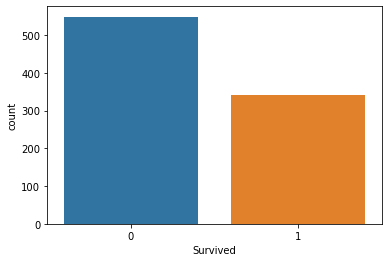

In [10]:
sns.countplot(x='Survived', data = train_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

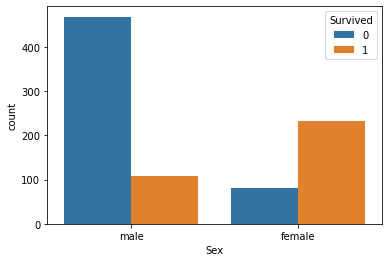

In [11]:
sns.countplot(x='Sex',data=train_df,hue='Survived')

In [12]:
gender_survival = train_df.groupby('Sex')['Survived'].sum()
print(gender_survival)

if gender_survival['female'] > gender_survival['male']:
    print('Females have a higher survival rate')
else:
    print('Males have a higher survival rate')


Sex
female    233
male      109
Name: Survived, dtype: int64
Females have a higher survival rate


### Surviving rate by Pclass

In [13]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

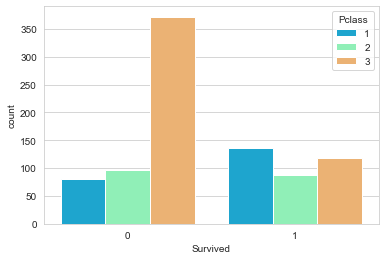

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_df, palette='rainbow')

In [15]:
class_survival = train_df.groupby('Pclass')['Survived'].sum()
print(class_survival)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

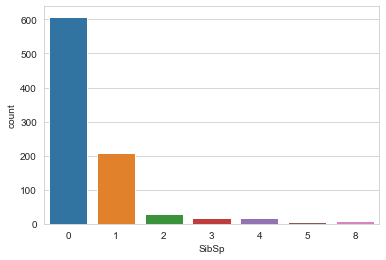

In [16]:
sns.countplot(x='SibSp',data=train_df)

<AxesSubplot:>

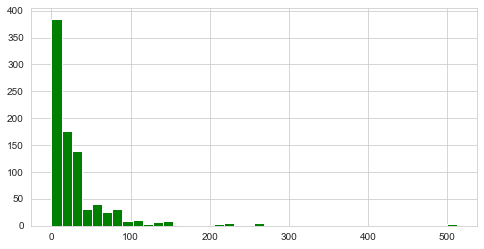

In [17]:
train_df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

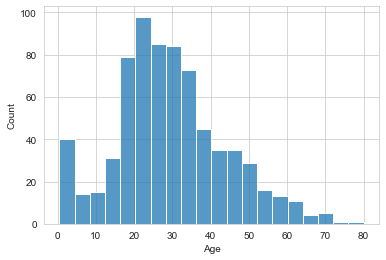

In [20]:
sns.histplot(x = 'Age', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

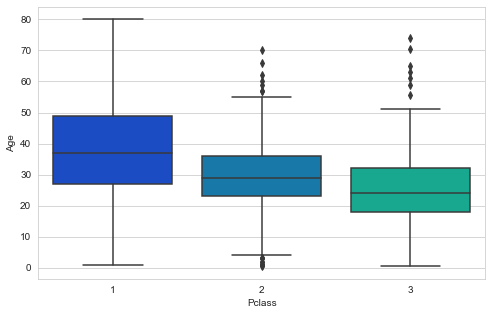

In [21]:
#box plot of age for each pclass
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

In [22]:
# We'll use these average age values to impute based on Pclass for Age.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [23]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
null = train_df['Cabin'].isnull().mean() * 100
print("Percentage of null values in Cabin variable: {:.2f}%".format(null))

Percentage of null values in Cabin variable: 77.10%


In [25]:
def preprocess(data):
        # Fill missing values
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    
    # Convert categorical variables to numerical
    data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # Drop irrelevant features
    data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    
    return data
    

In [26]:
# Preprocess the training and testing data
train_df = preprocess(train_df)
test_df = preprocess(test_df)

<AxesSubplot:>

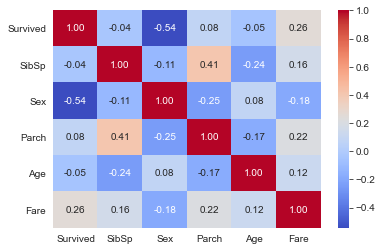

In [27]:
sns.heatmap(train_df[['Survived', 'SibSp', 'Sex','Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

## Model Building

#### train-test split

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [29]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [30]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

# fit and transform the features in X
X_scaled = scaler.fit_transform(X)

# print the scaled features
print(X_scaled)

[[ 0.82737724  0.73769513 -0.53383369 ... -0.47367361 -0.50244517
  -0.56883712]
 [-1.56610693 -1.35557354  0.67489052 ... -0.47367361  0.78684529
   1.00518113]
 [ 0.82737724 -1.35557354 -0.23165264 ... -0.47367361 -0.48885426
  -0.56883712]
 ...
 [ 0.82737724 -1.35557354 -0.38274316 ...  2.00893337 -0.17626324
  -0.56883712]
 [-1.56610693  0.73769513 -0.23165264 ... -0.47367361 -0.04438104
   1.00518113]
 [ 0.82737724  0.73769513  0.22161894 ... -0.47367361 -0.49237783
   2.57919938]]


In [31]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state =150)                                              

In [32]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN':KNeighborsClassifier(n_neighbors = 5),
    'SVM': SVC()
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"{name} accuracy: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Logistic Regression accuracy: 0.782 +/- 0.053
Accuracy: 0.866
Precision: 0.869
Recall: 0.768
F1-score: 0.815

Random Forest accuracy: 0.803 +/- 0.029
Accuracy: 0.849
Precision: 0.828
Recall: 0.768
F1-score: 0.797

KNN accuracy: 0.671 +/- 0.013
Accuracy: 0.765
Precision: 0.721
Recall: 0.638
F1-score: 0.677

SVM accuracy: 0.666 +/- 0.008
Accuracy: 0.704
Precision: 0.786
Recall: 0.319
F1-score: 0.454



After comparing the accuracy of several models, we found that the RandomForestClassifier model had the highest accuracy.

So I will use it to make a prediction to the test set.

In [33]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='accuracy')
print(f"{rf} accuracy: {scores}")
    
# Fit the model to the full training set and make predictions on the test set
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
# Evaluate the model on the test set
acc = accuracy_score(Y_test, Y_pred)
print (acc)

RandomForestClassifier() accuracy: [0.86013986 0.7972028  0.78169014 0.78169014 0.80985915]
0.7039106145251397


## Prediction on test data and submission

In [34]:
test_pred = rf.predict(test_df)

In [35]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': test_pred})

In [37]:
submission.to_csv('submission.csv', index=False)